# Support Vector Machine
Las máquinas de vector soporte (SVM, Support Vector Machines) son algoritmos de aprendizaje supervisado que se pueden utilizar tanto para resolver problemas de clasificación como de regresión. Las SVM dibujan un hiperplano entre dos grupos de datos de forma que se maximice el margen entre los conjuntos de puntos.

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


## Clasificador de ejemplo

Por ejemplo, se puede utilizar un clasificador de SVM para separar dos conjuntos de datos creados con `make_blobs`.

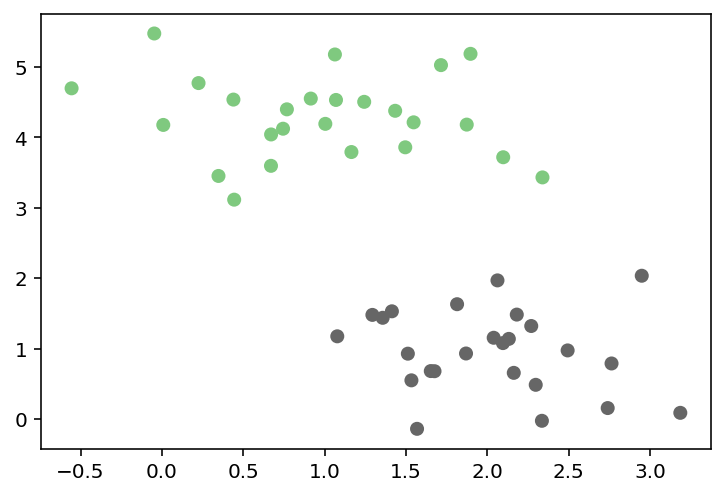

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 50,
                  centers = 2,
                  random_state = 0,
                  cluster_std = 0.60)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'Accent')

En primer lugar, se puede definir una función que permita definir los bordes del clasificador

In [3]:
def plot_sgd_separator(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # plot the line, the points, and the nearest vectors to the plane
    xx = np.linspace(x_min, x_max, 10)
    yy = np.linspace(y_min, y_max, 10)

    X1, X2 = np.meshgrid(xx, yy)
    Z = np.empty(X1.shape)
    for (i, j), val in np.ndenumerate(X1):
        x1 = val
        x2 = X2[i, j]
        p = clf.decision_function(np.array([[x1, x2]]))
        Z[i, j] = p[0]
    levels = [-1.0, 0.0, 1.0]
    linestyles = ['dashed', 'solid', 'dashed']
    colors = 'k'

    contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
    scatter(X[:, 0], X[:, 1], c = y, cmap = 'Accent')

Ahora esta función se puede utilizar para separar los conjuntos de datos utilizando clasificador SVM.

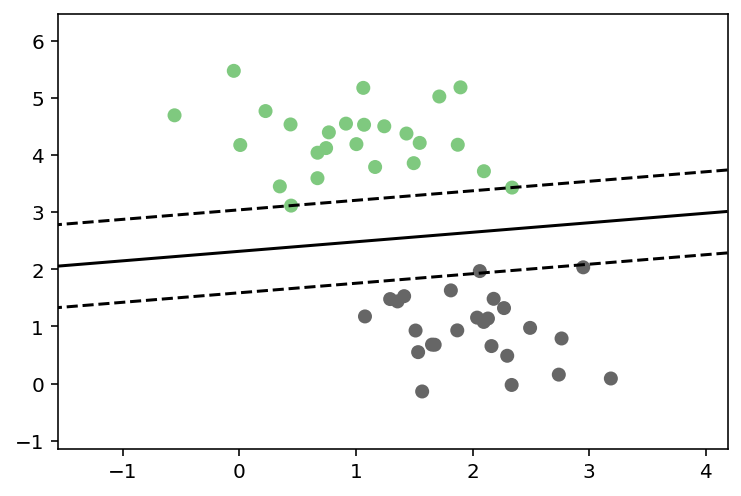

In [4]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear').fit(X, y)

plot_sgd_separator(clf, X, y)

Se puede repetir el ejercicio utilizando un conjunto de datos generado con la función ` make_circles`.

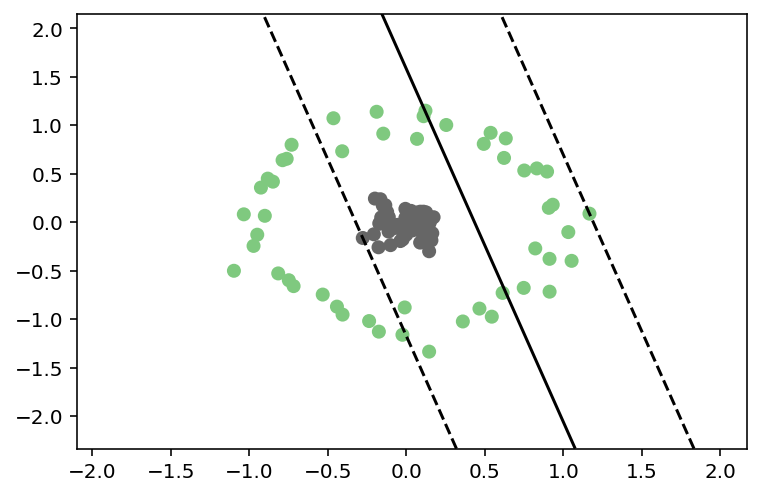

In [5]:
from sklearn.datasets import make_circles

X, y = make_circles(100,
                    factor = .1,
                    noise = .1,
                    random_state = 0)

clf = SVC(kernel = 'linear').fit(X, y)

plot_sgd_separator(clf, X, y)

En este caso se puede ver que el resultado no es del todo correcto ya que el clasificador utiliza una recta como frontera. Para esto se ha de modificar el núcleo (kernel) utilizado por el algoritmo.

## Los diferentes núcleos

En el ejemplo anterior se ha visto que en el clasificado se ha utilizado el núcleo `'lineal'`. El objeto SVM soporta los siguientes núcleos:

* linear: $\langle x, x' \rangle$ 
* poly: $(\gamma \langle x, x' \rangle + r)^d$
* rbf: $\exp(-\gamma ||x, x'||^2)$
* sigmoid:  $\tanh(\gamma \langle x, x' \rangle + r)$

Los valores de $r$, $d$ y $\gamma$ se pueden configurar con los parámetros `degree`, `coef0` y `gamma` respectivamente.

En el siguiente ejemplo se puede comprobar las diferencias de utilizar cada uno de estos kernels.

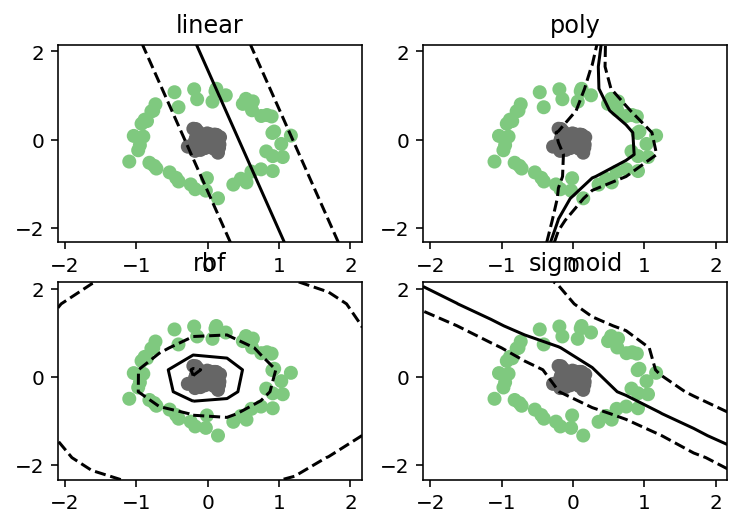

In [6]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for num_k in range(len(kernel)):
    clf = SVC(kernel = kernel[num_k], gamma='scale').fit(X, y)
    subplot(2, 2, 1 + num_k)
    plot_sgd_separator(clf, X, y)
    title(kernel[num_k])

## Aplicación al conjunto de datos de Iris
El conjunto de datos Iris contiene 50 muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor) en las que se midieron cuatro rasgos de cada muestra: el largo y el ancho de los sépalos y pétalos. Es un conjunto de datos muy utilizado para la construcción de modelos de ejemplo, encontrándose disponible en scikit-learn. La importación de los datos se realiza utilizando la función `load_iris` que se encuentra disponible en el conjunto de datos de ejemplo de scikit-learn (`sklearn.datasets`).

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()

# Para facilitar solamente se utilizan las dos primeras celdas
X = iris.data[:, 0:2]
y = iris.target

Inicialmente se crea una función para representar los datos.

In [8]:
from matplotlib.colors import ListedColormap

def plot_clasificator_areas(clf, X, y):
    # Version clara y oscura de los coloes
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Creación de un conjunto de datos para 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    pcolormesh(xx, yy, Z, cmap = cmap_light)
    scatter(X[:, 0], X[:, 1], c=y, cmap = cmap_bold)
    xlim(xx.min(), xx.max())
    ylim(yy.min(), yy.max())

Esta función de puede probar con el núcleo por defecto.

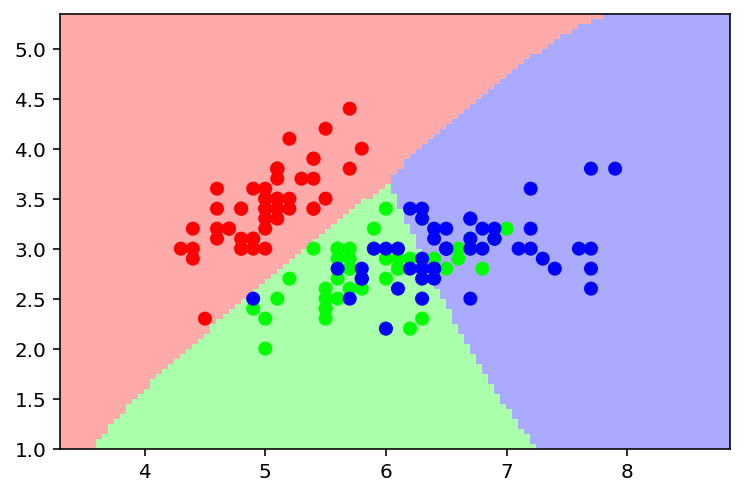

In [9]:
clf = SVC(gamma='scale').fit(X, y)
plot_clasificator_areas(clf, X, y)

Al mismo tiempo se pueden comparar los resultados con los diferentes nucleos.

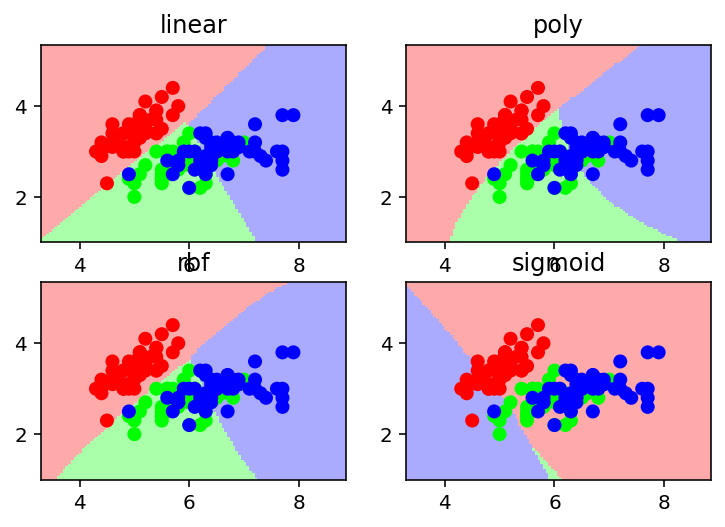

In [10]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for num_k in range(len(kernel)):
    clf = SVC(kernel = kernel[num_k], gamma='scale').fit(X, y)
    subplot(2, 2, 1 + num_k)
    plot_clasificator_areas(clf, X, y)
    title(kernel[num_k])

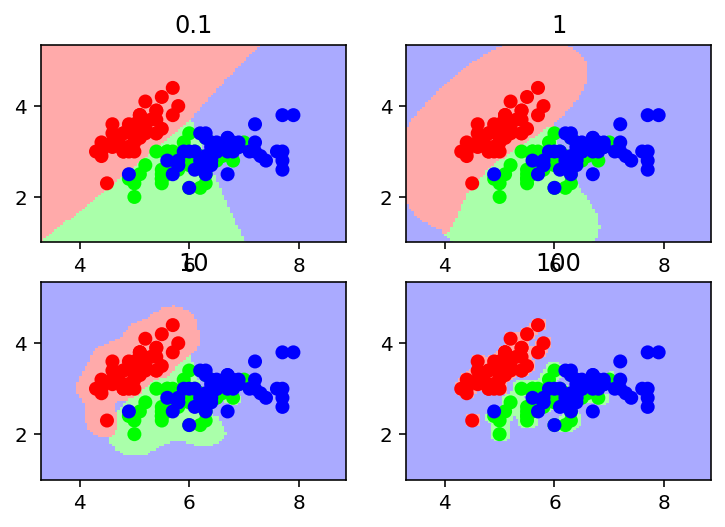

In [11]:
gamma = [0.1, 1, 10, 100]

for num_k in range(len(gamma)):
    clf = SVC(kernel = 'rbf', gamma = gamma[num_k]).fit(X, y)
    subplot(2, 2, 1 + num_k)
    plot_clasificator_areas(clf, X, y)
    title(gamma[num_k])

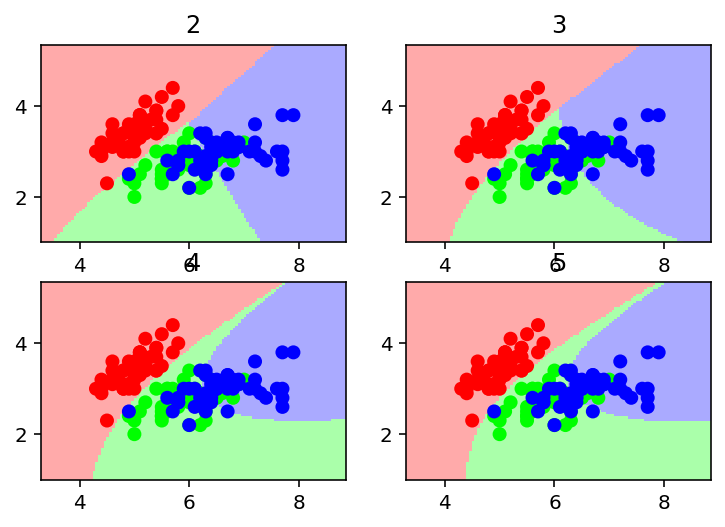

In [12]:
degree = [2, 3, 4, 5]

for num_k in range(len(gamma)):
    clf = SVC(kernel = 'poly', degree = degree[num_k], gamma='scale').fit(X, y)
    subplot(2, 2, 1 + num_k)
    plot_clasificator_areas(clf, X, y)
    title(degree[num_k])